In [1]:
import pandas as pd
import numpy as np

In [2]:
traindf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\\output\\dataset_mar_23\\new_train.csv')
valdf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\new_val.csv')

# Duplicate rows check

In [3]:
duplicate_rows = traindf[traindf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,cate_0,cate_1,cate_2,cate_3,...,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


In [4]:
duplicate_rows = valdf[valdf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,cate_0,cate_1,cate_2,cate_3,...,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


# Drop Columns
TDIL Channel title and title are different things

In [5]:
traindf = traindf[['video_id','title', 'tags', 'description', 'channelTitle', 'trending']]
valdf = valdf[['video_id','title', 'tags', 'description', 'channelTitle', 'trending']]

In [6]:
traindf['lang'] = traindf['title'] + ' ' + traindf['tags'] + ' ' + traindf['description'] + ' ' + traindf['channelTitle']
valdf['lang'] = valdf['title'] + ' ' + valdf['tags'] + ' ' + valdf['description'] + ' ' + valdf['channelTitle']
traindf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)
valdf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)

In [7]:
print(traindf.head())
print(valdf.head())

      video_id  trending                                               lang
0  Fk1I1SjiHY8         1  Power Book II: Ghost | Official Trailer | Seas...
1  fj3DzFrxs00         1  Julian Newman WENT OFF Against Tristan Jass an...
2  DoGeabe3baE         1  GET READY WITH US TO GO TO LES DO MAKEUP'S AND...
3  2PaeU_ABK94         1  Binging with Babish: Tater Tots from Breaking ...
4  yOBteav0s1g         0  My Friend sister Birthday Cake doll cake kaise...
      video_id  trending                                               lang
0  5VbC-QEo-DU         1  What's Next For The Boat That Was Sunk At The ...
1  1_D5EKcVXfo         0  Tapa Kimchi Rice | Home Foodie Cooking Show #M...
2  ix62ySKlxb0         1  TWICE READY TO BE Opening Trailer JYP Entertai...
3  9irICRnszOc         1  Primitive Technology: Iron Bacteria Cement (no...
4  w9B6G8Vty8s         1  EGG DROP - I Did A Thing vs William Osman lase...


In [8]:
traindf

,video_id,trending,lang
0,Fk1I1SjiHY8,1,Power Book II: Ghost | Official Trailer | Seas...
1,fj3DzFrxs00,1,Julian Newman WENT OFF Against Tristan Jass an...
2,DoGeabe3baE,1,GET READY WITH US TO GO TO LES DO MAKEUP'S AND...
3,2PaeU_ABK94,1,Binging with Babish: Tater Tots from Breaking ...
4,yOBteav0s1g,0,My Friend sister Birthday Cake doll cake kaise...
...,...,...,...
4319,RXT7Sn32OgI,1,Aaron Mercury - Apaga La Luz Aaron|Mercury|Apa...
4320,5gxwh5k71Xk,0,Sonic And Amy Funny Dance - Sonic And Amy Stor...
4321,kikZxTlNxcE,0,Check This Out! Custom Skoolie Exterior Tour!...
4322,3mVPclm-Jjg,0,Viral aiya susanti #shorts drako|drama lucu|fu...


### Preprocessing the lang

In [9]:
null_count = traindf['lang'].isnull().sum()

In [10]:
null_count

240

In [11]:
print(traindf[traindf['lang'].isnull()])

         video_id  trending lang
27    RSea1uAWlMA         0  NaN
57    nCIDD487dvU         0  NaN
68    49evr0nw_-M         0  NaN
90    8Zhx-RfWlwY         0  NaN
132   OCfPJ_6KSzs         0  NaN
...           ...       ...  ...
4186  _dFdTaxjFjc         1  NaN
4226  mEHn5Z7xSZQ         0  NaN
4253  77xibbN6IOg         0  NaN
4281  Y8XceFgBlcI         0  NaN
4314  YfEw7CUnxeA         0  NaN

[240 rows x 3 columns]


In [12]:
traindf.dropna(subset=['lang'], inplace=True)
valdf.dropna(subset=['lang'], inplace=True)

In [13]:
traindf = traindf.reset_index(drop=True)
valdf = valdf.reset_index(drop=True)

In [14]:
smallest_lang_value = min(traindf['lang'], key=lambda x: len(x))
print(smallest_lang_value)

Human elevator [none] #parkour Oliver Nordin


In [15]:
import string
import re
import nltk
nltk.data.path.append('C:/Users/cheek/ML-7641-Team14/shravan/nltk_data')
stopwords = nltk.corpus.stopwords.words('english')

In [16]:
max_length = traindf['lang'].apply(len).max()
print(max_length)

5510


In [17]:
max_length_index = traindf['lang'].str.len().idxmax()
row_with_max_length = traindf.loc[max_length_index]
row_with_max_length.apply(lambda x: print(x))

Ev-btXCVLsw
0
Robot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi | 3.0 full movie|3.0 full movie in tamil|2.0 full movie|3.0 full movie in hindi|robot 3.0 movie|3.0 in 2.0 movie|3.0 rajinikanth|3.0 trailer tamil|salman in 3.0 movie|2.0 movie|3.0 trailer|robot 3.0 full movie|robot 3.0 trailer full movie|robot 3.0 movies|full movie 2.0|3.0 rajinikanth tamil|3.0 rajinikanth hindi|2.0 full movie in hindi|robot 3.0|full movie|robot 3.0 full hd movie|rajnikant new movie|new south movie 2023|robot #robot3  #AkshayKumar #ShankarRobot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi |After a decade of research, scientist Vaseegaran creates a sophisticated android humanoid robot with the help of his assistants, Siva and Ravi, in order to commission it into the Indian Army. He introduces the robot, named Chitti, at a robotics conference in Chennai. Chitti helps Sana, Vaseegaran's medical student girlfriend

video_id    None
trending    None
lang        None
Name: 1949, dtype: object

In [18]:
import spacy

In [19]:
nlp = spacy.load('en_core_web_lg')

In [20]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('C:\\Users\\cheek\\ML-7641-Team14\\shravan\\newdatatry\\vectors', mmap='r')

In [21]:
wv.similarity('apple', 'orange')

0.39203462

In [22]:
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct or not token.text.isalpha() or token.text not in wv.key_to_index:
            continue
        filtered_tokens.append(token.lemma_)
        
    return filtered_tokens

In [23]:
example = 'This is a sample sentence, showing off the stop words filtration.'
print(preprocess(example))

example2 = '---------============ ===========------ -  = -= =sadsdas========== alpha===='
print(preprocess(example2))

['sample', 'sentence', 'show', 'stop', 'word', 'filtration']
['alpha']


In [24]:
def vectorize(filtered):
    return wv.get_mean_vector(filtered)

In [25]:
traindf['tokens'] = traindf['lang'].apply(lambda x: preprocess(x))
traindf['vector'] = traindf['tokens'].apply(lambda x: vectorize(x))

In [26]:
valdf['tokens'] = valdf['lang'].apply(lambda x: preprocess(x))
valdf['vector'] = valdf['tokens'].apply(lambda x: vectorize(x))

In [27]:
unique = traindf['tokens'].explode().unique()

In [28]:
sample_words = [word for word in unique if word in wv.key_to_index]
sample = np.array([wv[word] for word in sample_words])

In [29]:
import matplotlib.pyplot as plt

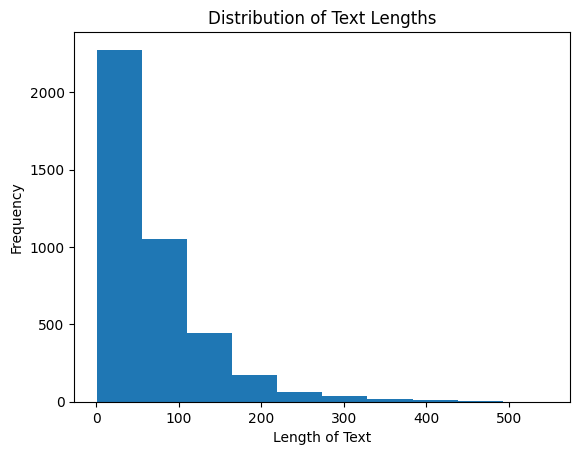

In [30]:
lengths = traindf['tokens'].apply(len)

plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Seperate prediction - y

In [31]:
y_train = traindf['trending']
y_val = valdf['trending']

In [32]:
X_train = np.stack(traindf['vector'])
X_test = np.stack(valdf['vector'])

In [33]:
X_train.shape

(4084, 300)

# Training w/ np array

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [35]:
traindf.columns

Index(['video_id', 'trending', 'lang', 'tokens', 'vector'], dtype='object')

In [36]:
video_ids = valdf['video_id'].tolist()

# NN

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [38]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 32)
        self.dropout4 = nn.Dropout(0.5)
        self.fc5 = nn.Linear(32, 16)
        self.dropout5 = nn.Dropout(0.5)
        self.fc6 = nn.Linear(16, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.relu(self.fc4(x))
        x = self.dropout4(x)
        x = F.relu(self.fc5(x))
        x = self.dropout5(x)
        x = self.fc6(x)
        return x

# class SimpleNN(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(SimpleNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, num_classes)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         #x = torch.sigmoid(x)
#         return x

In [39]:
train_data = torch.tensor(X_train, dtype=torch.float)
train_labels = torch.tensor(y_train, dtype=torch.float)
val_data = torch.tensor(X_test, dtype=torch.float)
val_labels = torch.tensor(y_val, dtype=torch.float)

train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [40]:
input_size = 300
num_classes = 1
model = SimpleNN(input_size, num_classes)

learning_rate = 0.0001
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

num_epochs = 40

train_loss_list = []
val_loss_list = []
val_accuracy_list = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")
    train_loss_list.append(train_loss)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            running_loss += loss.item()

            predicted = (F.sigmoid(outputs.data) > 0.5).float()

            total += labels.size(0)
            correct += (predicted == labels.view(-1, 1).float()).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

Epoch 1, Train Loss: 0.6917594345286489
Epoch 1, Validation Loss: 0.695407684892416, Validation Accuracy: 0.5089641434262948
Epoch 2, Train Loss: 0.691970958840102
Epoch 2, Validation Loss: 0.6952006816864014, Validation Accuracy: 0.5089641434262948
Epoch 3, Train Loss: 0.6923684026114643
Epoch 3, Validation Loss: 0.6949597708880901, Validation Accuracy: 0.5089641434262948
Epoch 4, Train Loss: 0.691396489739418
Epoch 4, Validation Loss: 0.6945887934416533, Validation Accuracy: 0.5089641434262948
Epoch 5, Train Loss: 0.6913578105159104
Epoch 5, Validation Loss: 0.6939208153635263, Validation Accuracy: 0.5089641434262948
Epoch 6, Train Loss: 0.6899485541507602
Epoch 6, Validation Loss: 0.6912969630211592, Validation Accuracy: 0.5089641434262948
Epoch 7, Train Loss: 0.6860266071744263
Epoch 7, Validation Loss: 0.6815931759774685, Validation Accuracy: 0.5089641434262948
Epoch 8, Train Loss: 0.6703625302761793
Epoch 8, Validation Loss: 0.6457081157714128, Validation Accuracy: 0.764940239043

## NN visuals

In [42]:
# import torchviz
# x = torch.randn(1, input_size)

# # Visualize the model
# torchviz.make_dot(model(x), params=dict(model.named_parameters()))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
def plot_metrics(train_loss, val_loss, val_acc):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

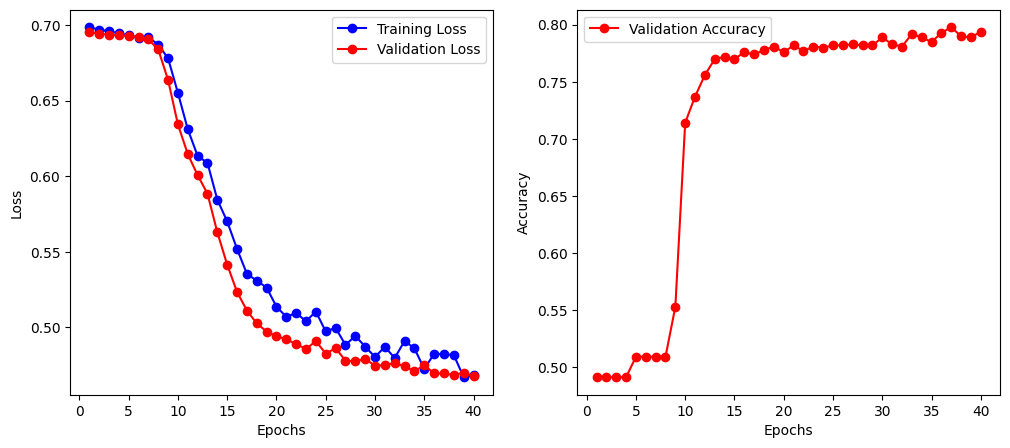

In [ ]:
plot_metrics(train_loss_list, val_loss_list, val_accuracy_list)

In [ ]:
predictions = []

with torch.no_grad():
    for inputs, _ in val_dataloader:
        outputs = model(inputs)
        probabilities = F.sigmoid(outputs.data).view(-1)

        predicted = (probabilities > 0.5).float()
        predictions.extend(predicted.tolist())

combined = list(zip(video_ids, predictions))
        
with open("predictionsSupervised.txt", "w") as f:
    for id,pred in combined:
        f.write(f"{id},{pred}\n")


# 1CC

In [ ]:
onec_train = traindf.loc[traindf['trending'] == 1]
onec_val = valdf

In [ ]:
yc_train = onec_train['trending']
yc_val = onec_val['trending']

In [ ]:
Xc_train = np.stack(onec_train['vector'])
Xc_test = np.stack(onec_val['vector'])

In [ ]:
train_data = torch.tensor(Xc_train, dtype=torch.float)
train_labels = torch.tensor(yc_train, dtype=torch.float)
val_data = torch.tensor(Xc_test, dtype=torch.float)
val_labels = torch.tensor(yc_val, dtype=torch.float)

train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
class OneClassNN(nn.Module):
    def __init__(self, input_size):
        super(OneClassNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# class OneClassNN(nn.Module):
#     def __init__(self, input_size):
#         super(OneClassNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, 256)
#         self.dropout1 = nn.Dropout(0.5)
#         self.fc2 = nn.Linear(256, 128)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc3 = nn.Linear(128, 64)
#         self.dropout3 = nn.Dropout(0.5)
#         self.fc4 = nn.Linear(64, 32)
#         self.dropout4 = nn.Dropout(0.5)
#         self.fc5 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = self.dropout1(x)
#         x = F.relu(self.fc2(x))
#         x = self.dropout2(x)
#         x = F.relu(self.fc3(x))
#         x = self.dropout3(x)
#         x = F.relu(self.fc4(x))
#         x = self.dropout4(x)
#         x = self.fc5(x)
#         return x


In [ ]:
def one_class_hinge_loss(outputs, margin=1.0):
    return torch.mean(F.relu(margin - outputs))

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_size)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


input_size = 300
model = Autoencoder(input_size)

learning_rate = 0.0001
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

num_epochs = 25

train_loss_list = []
val_loss_list = []
val_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, _ in train_dataloader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")
    train_loss_list.append(train_loss)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, inputs)

            running_loss += loss.item()

            reconstruction_error = torch.mean((outputs - inputs)**2, dim=1)
            predicted = (reconstruction_error > 0).float()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)


Epoch 1, Train Loss: 0.001078838709337801
Epoch 1, Validation Loss: 0.0004124740671613836, Validation Accuracy: 0.5089641434262948
Epoch 2, Train Loss: 0.0002691856720690232
Epoch 2, Validation Loss: 0.00027256278872300754, Validation Accuracy: 0.5089641434262948
Epoch 3, Train Loss: 0.00023792124364477145
Epoch 3, Validation Loss: 0.0002720322490858962, Validation Accuracy: 0.5089641434262948
Epoch 4, Train Loss: 0.00023790127007112673
Epoch 4, Validation Loss: 0.0002719275785239006, Validation Accuracy: 0.5089641434262948
Epoch 5, Train Loss: 0.0002376667237994672
Epoch 5, Validation Loss: 0.0002725495246522769, Validation Accuracy: 0.5089641434262948
Epoch 6, Train Loss: 0.0002378264541809639
Epoch 6, Validation Loss: 0.000272395364845579, Validation Accuracy: 0.5089641434262948
Epoch 7, Train Loss: 0.00023789617711479557
Epoch 7, Validation Loss: 0.00027222258677284117, Validation Accuracy: 0.5089641434262948
Epoch 8, Train Loss: 0.00023804808006389067
Epoch 8, Validation Loss: 0.0

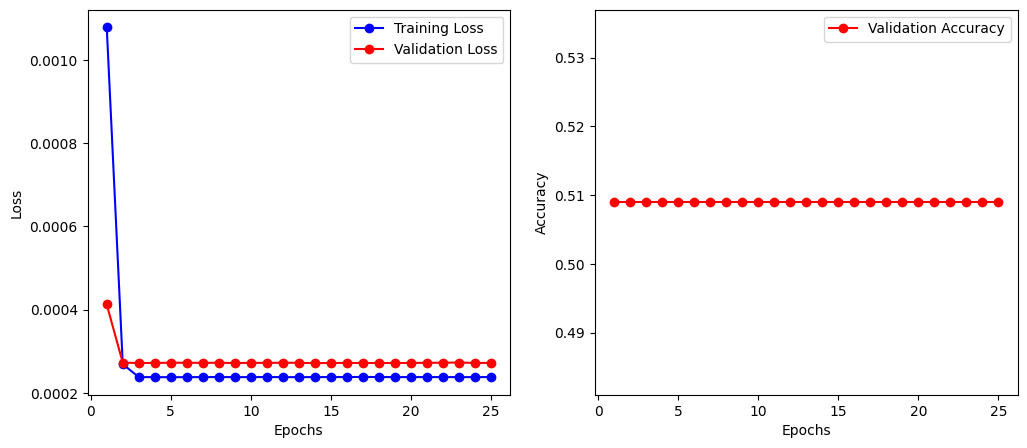

In [ ]:
plot_metrics(train_loss_list, val_loss_list, val_accuracy_list)

In [ ]:
input_size = 300
num_classes = 1
model = OneClassNN(input_size)

learning_rate = 0.0001
#criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

num_epochs = 25

train_loss_list = []
val_loss_list = []
val_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = one_class_hinge_loss(outputs)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")
    train_loss_list.append(train_loss)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = one_class_hinge_loss(outputs)

            running_loss += loss.item()

            

            total += labels.size(0)
            correct += (predicted == labels.view(-1, 1).float()).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

Epoch 1, Train Loss: 0.8704624517875559
Epoch 1, Validation Loss: 0.8236069418489933, Validation Accuracy: 6.107569721115538
Epoch 2, Train Loss: 0.7520405010265463
Epoch 2, Validation Loss: 0.6619070991873741, Validation Accuracy: 6.107569721115538
Epoch 3, Train Loss: 0.5057505461222985
Epoch 3, Validation Loss: 0.3127455860376358, Validation Accuracy: 6.107569721115538
Epoch 4, Train Loss: 0.08372617663596482
Epoch 4, Validation Loss: 0.0017671866808086634, Validation Accuracy: 6.107569721115538
Epoch 5, Train Loss: 0.00032484488260439215
Epoch 5, Validation Loss: 0.0010794365662150085, Validation Accuracy: 6.107569721115538
Epoch 6, Train Loss: 0.00018960675772498637
Epoch 6, Validation Loss: 0.0007195283542387187, Validation Accuracy: 6.107569721115538
Epoch 7, Train Loss: 0.00012514693020527964
Epoch 7, Validation Loss: 0.000574931560549885, Validation Accuracy: 6.107569721115538
Epoch 8, Train Loss: 8.208619649795925e-05
Epoch 8, Validation Loss: 0.00044223328586667776, Validati

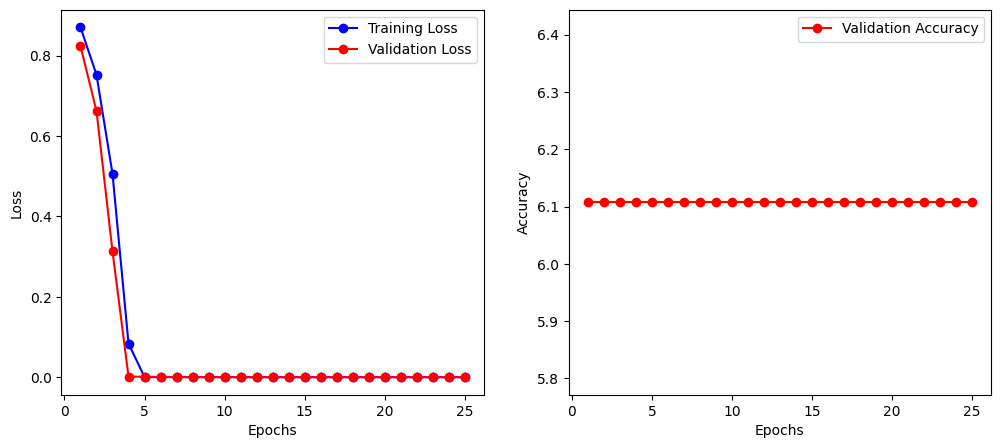

In [ ]:
plot_metrics(train_loss_list, val_loss_list, val_accuracy_list)

In [ ]:
predictions = []

with torch.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs.data) > 0.5).float()
        
        predictions.extend(predicted[0])

combined = list(zip(video_ids, predictions))
        
with open("predictionsOneClass.txt", "w") as f:
    for id,pred in combined:
        f.write(f"{id},{pred}\n")
